## Shivam Chauhan week 1 assignment: Logistic Regression on Titanic Dataset 

In [172]:
#loading the libraries 
import pandas as pd
import os


In [40]:
#loading the files
os.getcwd()
os.chdir("C:/Users\Shivam\OneDrive - Northeastern University\STUDY\EAI 6000 - FAI\Week 1 - logistic")
os.getcwd()
df = pd.read_csv("train_data.csv")

In [171]:
#check the dataset
df.head(5)

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [173]:
#check for the missing value 

df.isnull().values.any()

False

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 17 columns):
Unnamed: 0     792 non-null int64
PassengerId    792 non-null int64
Survived       792 non-null int64
Sex            792 non-null int64
Age            792 non-null float64
Fare           792 non-null float64
Pclass_1       792 non-null int64
Pclass_2       792 non-null int64
Pclass_3       792 non-null int64
Family_size    792 non-null float64
Title_1        792 non-null int64
Title_2        792 non-null int64
Title_3        792 non-null int64
Title_4        792 non-null int64
Emb_1          792 non-null int64
Emb_2          792 non-null int64
Emb_3          792 non-null int64
dtypes: float64(3), int64(14)
memory usage: 105.3 KB


So our data is clean and there are no duplicate values in it. Now we can prepare our data for model building. 

In [71]:
#Creating arrays for train data and test data. Also removing the unique ID which are column 1 and 2. 
x = df.iloc[:,3:].values
y = df.iloc[:,2].values

In [75]:
#splitting data into 80% train data and 20% test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

# Fitting the Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
log_m = LogisticRegression()
log_m.fit(x_train,y_train)

C:\Users\Shivam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
#predicting test results using the model we just built
y_pred = log_m.predict(x_test)

In [143]:
from sklearn.metrics import confusion_matrix as cm
confusion_matrix = cm(y_test,y_pred)
print(confusion_matrix)

[[84 16]
 [17 42]]


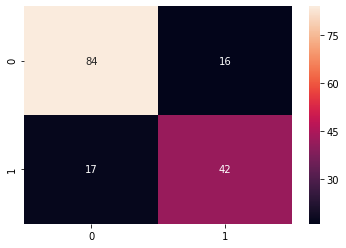

In [170]:
# visualizing the confusion matrics
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True)


We can observe our model predicted 84 deaths and 42 survived correctly. 

In [94]:
#checking the accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7924528301886793

Our accuracy of the logistic model is 0.79%. 